In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)


In [2]:
type_map = forecasting_algo_type()

In [3]:
figures_directory = 'figures'

In [4]:
df = pd.read_csv('feature_importance/merged_feature_importance.csv', index_col=0)
df = df.dropna(axis=1, how='any')

In [5]:
static_columns = ['feature_importance_method', 'forecasting_algorithm', 'ml_algorithm', 'run']
feature_columns = set(df.columns) - set(static_columns)
feature_columns = sorted(list(feature_columns))

In [6]:
df = feature_importance_to_feature_rank(df, feature_columns)

In [7]:
df['forecasting_algorithm_type'] = df['forecasting_algorithm'].map(type_map)
df['forecasting_algorithm_type'].unique()

array(['Statistical', 'Combination', 'Machine Learning', 'Hybrid'],
      dtype=object)

In [8]:
df = df.query(f'feature_importance_method == "shap" or feature_importance_method == "permutation"')
df = df.query(f'ml_algorithm != "M4DummyMeanRegression"')
#df

In [9]:
l = df.melt(id_vars=static_columns+['forecasting_algorithm_type'], var_name="feature", value_name="importance").groupby(['feature_importance_method','ml_algorithm', 'feature', 'forecasting_algorithm_type']).agg({'importance':'mean'}).reset_index()
#l

In [10]:
df2 = l.groupby(['forecasting_algorithm_type', 'feature'])['importance'].mean().unstack().T.reset_index()
df2['feature'] = df2['feature'].map(get_feature_name_map())
df2

forecasting_algorithm_type,feature,Combination,Hybrid,Machine Learning,Statistical
0,"agg_linear_trend_attr_""slope""_chunk_len_10_f_a...",53.969196,52.908333,52.321528,53.355128
1,"agg_linear_trend_attr_""stderr""_chunk_len_10_f_...",46.583780,46.766667,48.945139,45.142147
2,"agg_linear_trend_attr_""stderr""_chunk_len_5_f_a...",61.375595,61.508333,61.103472,60.485577
3,ar_coefficient_coeff_10_k_10,24.434077,22.645833,23.190278,24.272596
4,"augmented_dickey_fuller_attr_""teststat""_autola...",37.513690,33.558333,40.303472,38.386218
...,...,...,...,...,...
58,symmetry_looking_r_0.15,13.966815,13.770833,15.038889,14.038542
59,symmetry_looking_r_0.2,11.069494,10.727083,10.904514,10.914824
60,symmetry_looking_r_0.30,7.995015,8.154167,8.240625,8.018750
61,symmetry_looking_r_0.4,6.496801,6.400000,6.361806,6.441506


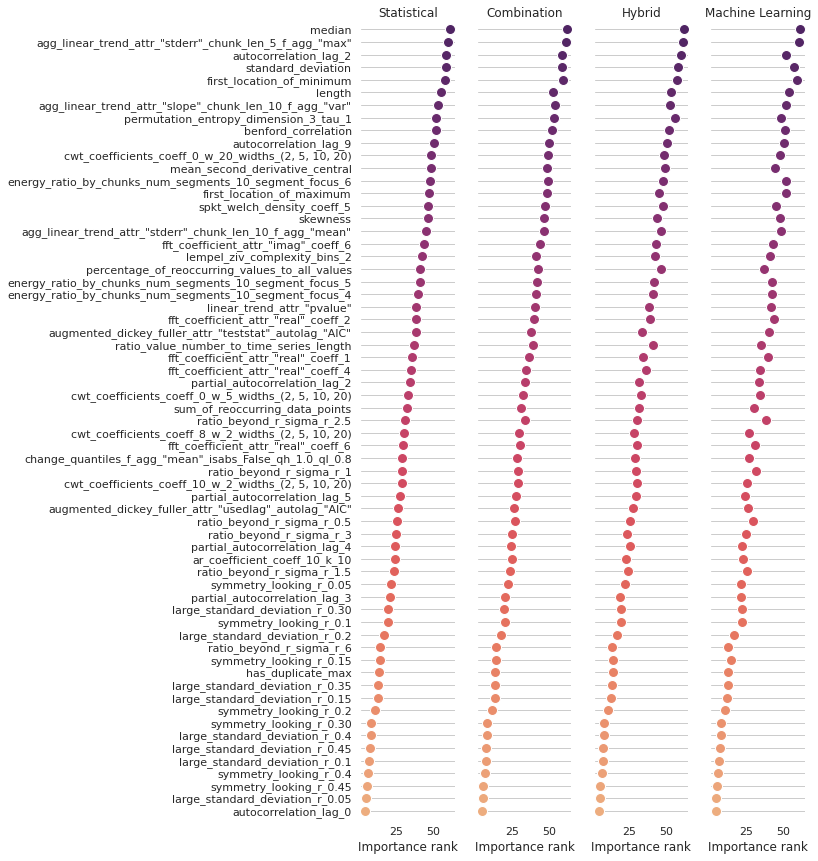

In [11]:
sns.set_theme(style="whitegrid")

# Use semantically meaningful titles for the columns
titles = ['Statistical', 'Combination', 'Hybrid', 'Machine Learning']

# Make the PairGrid
g = sns.PairGrid(df2.sort_values(by="Statistical", ascending=False),
                 x_vars=titles, y_vars=["feature"],
                 height=12, aspect=.15)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="Importance rank", ylabel="")

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.savefig(f'{figures_directory}/feature_importance_forecasting_algo_type.pdf', bbox_inches='tight', pad_inches=0)